# Data Loading

In [1]:
import pandas as pd

board_games = pd.read_csv("board_games.csv")

board_games.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [7]:
#dropping rows with NAs and no ratings
board_games = board_games.dropna(axis = 0)
board_games = board_games[board_games["users_rated"] > 0]

# Picking an Error Metric

## Histogram of Average Ratings

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

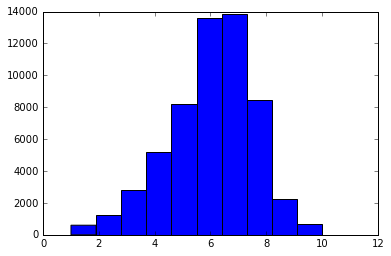

In [13]:
plt.hist(board_games["average_rating"])
plt.show()

In [18]:
print(board_games["average_rating"].std())
print(board_games["average_rating"].mean())

1.57882993483
6.01611284933


## Box & Whisker Plot

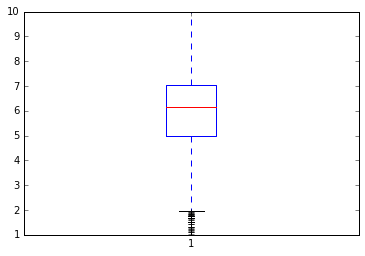

In [15]:
plt.boxplot(board_games["average_rating"])
plt.show()

## Error Metric
Makes sense here to use MSE. This is because the data is continuous, and follows a somewhat normal distribution. We'll be able to compare our error to the standard deviation to see how good the model is at predictions.

**Also, we want to penalize larger errors. So MSE in this case

# Plotting Clusters

In [30]:
from sklearn.cluster import KMeans
import numpy as np
kmeans_model = KMeans(n_clusters = 5, random_state= 1) #instantiate kmeans
numeric_columns = board_games.ix[:, 3:20] #remove non numeric columns
numeric_columns.head(5)

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [31]:
kmeans_model.fit(numeric_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [32]:
labels = kmeans_model.labels_
print(labels[0:5])

[1 1 1 1 2]


In [37]:
game_mean = numeric_columns.apply(np.mean, axis=1)
game_mean.head(5)

0    3806.296359
1    2662.195541
2    1979.243229
3    2467.201242
4    6360.675421
dtype: float64

In [38]:
game_std = numeric_columns.apply(np.std, axis =1)
game_std.head(5)

0     7450.209585
1     4933.084135
2     3514.218155
3     4367.915199
4    13321.625345
dtype: float64

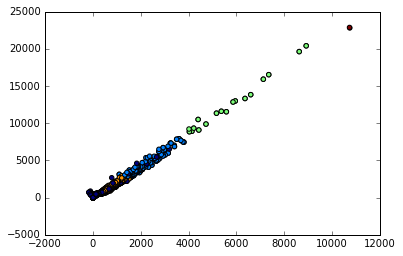

In [40]:
plt.scatter(game_mean, game_std, c = labels)
plt.show()

It looks like most of the games are similar, but as the game attributes tend to increase in value (such as number of users who rated), there are fewer high quality games. So most games don't get played much, but a few get a lot of players.


# Finding Correlations

Finding correlations let us compare predictive power and remove columns that don't add to the predictive power and to prevent overfitting.

In [43]:
correlations = numeric_columns.corr()
correlations

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
yearpublished,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081
bayes_average_rating,0.140998,0.034915,-0.003437,0.045341,0.041845,0.045341,0.266937,0.317992,0.231563,1.000000,0.371017,0.455021,0.426708,0.377213,0.371031,0.313302,0.482356


In [44]:
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

The yearpublished column is surprisingly highly correlated with average_rating, showing that more recent games tend to be rated more highly. Games for older players (minage is high) tend to be more highly rated. The more "weighty" a game is (average_weight is high), the more highly it tends to be rated.

In [46]:
cols = list(numeric_columns.columns)
cols.remove("average_rating")
cols.remove("bayes_average_rating")

# Fitting a Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(board_games[cols], board_games["average_rating"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
predictions = reg.predict(board_games[cols])

In [53]:
#Calculating MSE

np.mean((predictions - board_games["average_rating"])**2)

2.0933969758339361

The error rate is close to the standard deviation of all board game ratings. This indicates that our model may not have high predictive power. We'll need to dig more into which games were scored well, and which ones weren't.

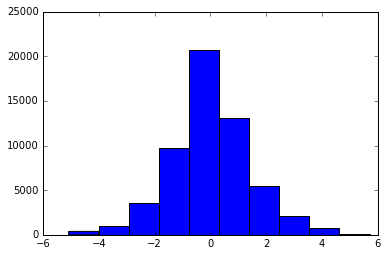

In [57]:
plt.hist(predictions - board_games["average_rating"])
plt.show()